# TEMPLATE 1 - PREPROCESSING

# Libraries

In [186]:
import pandas as pd     # DataFrame management
import numpy as np      # Matri calculations
import matplotlib.pyplot as plt    # Visualization
import seaborn as sns              # Visualization

import warnings
warnings.filterwarnings("ignore")  # Disable warnings

# Import data

In [187]:
df = pd.read_csv('malware_traintest.csv')

In [188]:
#Make a general observation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [189]:
df.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,8,85219.0,NaN,205.0,172,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,1443.0,275891.0,4.0,5.0,2273.0,NaN,953869.0,HDD,952838.0,0,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,27.0,120,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,355.0,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,129,54198.0,NaN,126.0,124,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2102.0,248850.0,4.0,5.0,2660.0,NaN,476940.0,HDD,457600.0,0,8192.0,Notebook,13.2,1280.0,720.0,Mobile,lion,0.000000e+00,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,18.0,72,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,486.0,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,46781.0,2.0,1.0,1,149,122689.0,27.0,181.0,56,windows10,x64,10.0.0.0,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,1.0,0,NaN,0.0,74.0,RequireAdmin,1.0,1.0,Convertible,Windows.Desktop,2206.0,238234.0,4.0,5.0,2998.0,NaN,244198.0,SSD,221251.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.10586.1176,amd64,th2_release_sec,10586,1176,Core,CORE,Update,24.0,109,Notify,0,IS_GENUINE,Retail,NaN,0.0,Retail,0.0,554.0,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,164,114587.0,27.0,205.0,172,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,525.0,265410.0,8.0,5.0,2880.0,NaN,228936.0,SSD,228321.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobil

# Preprocessing

In [190]:
#Check that there are no duplicate rows
df[df.duplicated(keep=False)]

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


In [191]:
#After creating a table and analyzing each of the columns, we have decided to eliminate the columns that do not provide information, 
#that can cause an overfitting in the model and those that have a lot of nulls.
#The columns to eliminate are the following:
df.drop(['Unnamed: 0', 
         'MachineIdentifier', 
         'AvSigVersion', 
         'IsBeta', 
         'IsSxsPassiveMode', 
         'DefaultBrowsersIdentifier', 
         'HasTpm', 
         'CountryIdentifier', 
         'CityIdentifier', 
         'OrganizationIdentifier', 
         'GeoNameIdentifier', 
         'LocaleEnglishNameIdentifier', 
         'OsBuildLab', 
         'AutoSampleOptIn', 
         'PuaMode', 
         'SMode', 
         'IeVerIdentifier', 
         'UacLuaenable', 
         'Census_DeviceFamily', 
         'Census_OEMNameIdentifier', 
         'Census_OEMModelIdentifier', 
         'Census_ProcessorModelIdentifier', 
         'Census_ProcessorClass', 
         'Census_InternalPrimaryDisplayResolutionHorizontal', 
         'Census_InternalPrimaryDisplayResolutionVertical', 
         'Census_InternalBatteryType', 
         'Census_InternalBatteryNumberOfCharges', 
         'Census_OSVersion', 
         'Census_OSArchitecture', 
         'Census_OSBranch', 
         'Census_OSBuildNumber', 
         'Census_OSSkuName', 
         'Census_OSInstallLanguageIdentifier', 
         'Census_OSUILocaleIdentifier', 
         'Census_IsFlightingInternal', 
         'Census_IsFlightsDisabled', 
         'Census_ThresholdOptIn', 
         'Census_FirmwareManufacturerIdentifier', 
         'Census_FirmwareVersionIdentifier', 
         'Census_IsWIMBootEnabled', 
         'Census_IsVirtualDevice',
         'Wdft_RegionIdentifier',
         'Census_ChassisTypeName',
         'Census_OSBuildRevision',
         'RtpStateBitfield',
         'AVProductsEnabled'], 
        
        axis = 'columns', inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 38 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AVProductStatesIdentifier                          498062 non-null  float64
 4   AVProductsInstalled                                498062 non-null  float64
 5   Platform                                           500000 non-null  object 
 6   Processor                                          500000 non-null  object 
 7   OsVer                                              500000 non-null  object 
 8   OsBuild                                            500000 non-null  int64 

In [193]:
#We can see the number of nulls in the remaining columns to fill in with what is necessary
df.isnull().sum()

ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
Platform                                                  0
Processor                                                 0
OsVer                                                     0
OsBuild                                                   0
OsSuite                                                   0
OsPlatformSubRelease                                      0
SkuEdition                                                0
IsProtected                                            1926
SmartScreen                                          178596
Firewall                                               5162
Census_MDC2FormFactor                                     0
Census_ProcessorCoreCount               

In [194]:
#We fill in each column according to each condition already analyzed:

#in those where there is a very predominant category, we convert them to this one (in cat and bool).
#in the numerical ones we convert to the median since the distribution is not normal.

df["AVProductStatesIdentifier"].fillna(53447.0,inplace=True)

median_AVProductsInstalled = df['AVProductsInstalled'].median()
df["AVProductsInstalled"].fillna(median_AVProductsInstalled,inplace=True)

df["IsProtected"].fillna(1.0,inplace=True)

df["SmartScreen"].fillna('Otros',inplace=True)

df["Firewall"].fillna(1.0,inplace=True)

median_Census_ProcessorCoreCount = df['Census_ProcessorCoreCount'].median()
df["Census_ProcessorCoreCount"].fillna(median_Census_ProcessorCoreCount,inplace=True)

df["Census_ProcessorManufacturerIdentifier"].fillna('Otros',inplace=True)

median_Census_PrimaryDiskTotalCapacity = df['Census_PrimaryDiskTotalCapacity'].median()
df["Census_PrimaryDiskTotalCapacity"].fillna(median_Census_PrimaryDiskTotalCapacity,inplace=True)

df["Census_PrimaryDiskTypeName"].fillna('UNKNOWN',inplace=True)

median_Census_SystemVolumeTotalCapacity = df['Census_SystemVolumeTotalCapacity'].median()
df["Census_SystemVolumeTotalCapacity"].fillna(median_Census_SystemVolumeTotalCapacity,inplace=True)

median_Census_TotalPhysicalRAM = df['Census_TotalPhysicalRAM'].median()
df["Census_TotalPhysicalRAM"].fillna(median_Census_TotalPhysicalRAM,inplace=True)

median_Census_InternalPrimaryDiagonalDisplaySizeInInches = df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].median()
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].fillna(median_Census_InternalPrimaryDiagonalDisplaySizeInInches,inplace=True)

df["Census_PowerPlatformRoleName"].fillna('Mobile',inplace=True)

df["Census_IsAlwaysOnAlwaysConnectedCapable"].fillna(0.0,inplace=True)

df["Wdft_IsGamer"].fillna(0.0,inplace=True)

In [195]:
#We checked that all nulls have been replaced
df.isnull().sum()

ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
Platform                                             0
Processor                                            0
OsVer                                                0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
SkuEdition                                           0
IsProtected                                          0
SmartScreen                                          0
Firewall                                             0
Census_MDC2FormFactor                                0
Census_ProcessorCoreCount                            0
Census_ProcessorManufacturerIdentifier               0
Census_Pri

In [196]:
df.head()

,ProductName,EngineVersion,AppVersion,AVProductStatesIdentifier,AVProductsInstalled,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,SmartScreen,Firewall,Census_MDC2FormFactor,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_PowerPlatformRoleName,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,53447.0,1.0,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,RequireAdmin,1.0,Desktop,4.0,5.0,953869.0,HDD,952838.0,0,8192.0,23.0,Desktop,Professional,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:DM,Retail,0,0,0,0.0,0.0,1
1,win8defender,1.1.15100.1,4.18.1807.18075,53447.0,1.0,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,RequireAdmin,1.0,Notebook,4.0,5.0,476940.0,HDD,457600.0,0,8192.0,13.2,Mobile,Professional,UUPUpgrade,FullAuto,0,IS_GENUINE,OEM:DM,Retail,0,0,0,0.0,1.0,0
2,win8defender,1.1.15100.1,4.9.10586.1106,46781.0,2.0,windows10,x64,10.0.0.0,10586,768,th2,Home,1.0,RequireAdmin,1.0,Convertible,4.0,5.0,244198.0,SSD,221251.0,0,8192.0,15.5,Mobile,Core,Update,Notify,0,IS_GENUINE,Retail,Retail,1,1,1,0.0,0.0,0
3,win8defender,1.1.15200.1,4.18.1807.18075,53447.0,1.0,windows10,x64,10.0.0.0,17134,768,rs4,Home,1.0,Otros,1.0,Notebook,8.0,5.0,228936.0,SSD,228321.0,0,8192.0,15.5,Mobile,Core,IBSClean,FullAuto,0,IS_GENUINE,Retail,Retail,1,0,0,0.0,0.0,1
4,win8defender,1.1.15200.1,4.18.1807.18075,47238.0,2.0,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,RequireAdmin,1.0,Notebook,4.0,1.0,476940.0,HDD,464374.0,0,4096.0,15.5,Mobile,Professional,Update,FullAuto,0,IS_GENUINE,OEM:DM,Retail,1,1,0,0.0,1.0,1


# Column analysis and value cleaning:

In [197]:
#in the first category, we are going to group the mse
df['ProductName'].value_counts()

win8defender     494604
mse                5395
mseprerelease         1
Name: ProductName, dtype: int64

In [198]:
df['ProductName'].replace('mseprerelease','mse', inplace=True)

In [199]:
df['ProductName'].value_counts()

win8defender    494604
mse               5396
Name: ProductName, dtype: int64

In [200]:
#In the next one we group those that are not windows 10 in 'Others'
df['Platform'].value_counts()

windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: Platform, dtype: int64

In [201]:
df['Platform'].replace('windows8','Otros', inplace=True)
df['Platform'].replace('windows7','Otros', inplace=True)
df['Platform'].replace('windows2016','Otros', inplace=True)

In [202]:
df['Platform'].value_counts()

windows10    483048
Otros         16952
Name: Platform, dtype: int64

In [203]:
#We group the 64
df['Processor'].value_counts()

x64      454423
x86       45563
arm64        14
Name: Processor, dtype: int64

In [204]:
df['Processor'].replace('arm64','x64', inplace=True)

In [205]:
df['Processor'].value_counts()

x64    454437
x86     45563
Name: Processor, dtype: int64

In [206]:
#We group by rs4, rs3 and 'others'.
df['OsPlatformSubRelease'].value_counts()

rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64

In [207]:
df['OsPlatformSubRelease'].replace('rs2','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('rs1','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('th2','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('th1','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('windows8.1','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('windows7','Otros', inplace=True)
df['OsPlatformSubRelease'].replace('prers5','Otros', inplace=True)

In [208]:
#Grouping by Pro, Home and Others
df['SkuEdition'].value_counts()

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

In [209]:
df['SkuEdition'].replace('Invalid','Otros', inplace=True)
df['SkuEdition'].replace('Education','Otros', inplace=True)
df['SkuEdition'].replace('Enterprise','Otros', inplace=True)
df['SkuEdition'].replace('Enterprise LTSB','Otros', inplace=True)
df['SkuEdition'].replace('Cloud','Otros', inplace=True)
df['SkuEdition'].replace('Server','Otros', inplace=True)

In [210]:
df['SkuEdition'].value_counts()

Home     308567
Pro      181042
Otros     10391
Name: SkuEdition, dtype: int64

In [211]:
#We group them all in others and in requireadmin
df['SmartScreen'].value_counts()

RequireAdmin    241594
Otros           178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

In [212]:
df['SmartScreen'].replace('ExistsNotSet','Otros', inplace=True)
df['SmartScreen'].replace('Off','Otros', inplace=True)
df['SmartScreen'].replace('Warn','Otros', inplace=True)
df['SmartScreen'].replace('Prompt','Otros', inplace=True)
df['SmartScreen'].replace('Block','Otros', inplace=True)
df['SmartScreen'].replace('off','Otros', inplace=True)
df['SmartScreen'].replace('On','Otros', inplace=True)
df['SmartScreen'].replace('&#x02;','Otros', inplace=True)
df['SmartScreen'].replace('&#x01;','Otros', inplace=True)
df['SmartScreen'].replace('on','Otros', inplace=True)
df['SmartScreen'].replace('requireadmin','RequireAdmin', inplace=True)

In [213]:
df['SmartScreen'].value_counts()

Otros           258405
RequireAdmin    241595
Name: SmartScreen, dtype: int64

In [214]:
#We group in notebook, desktop and others.
df['Census_MDC2FormFactor'].value_counts()

Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: Census_MDC2FormFactor, dtype: int64

In [215]:
df['Census_MDC2FormFactor'].replace('Convertible','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('Detachable','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('AllInOne','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('PCOther','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('LargeTablet','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('SmallTablet','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('SmallServer','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('MediumServer','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('LargeServer','Otros', inplace=True)
df['Census_MDC2FormFactor'].replace('ServerOther','Otros', inplace=True)

In [216]:
df['Census_MDC2FormFactor'].value_counts()

Notebook    320948
Desktop     109527
Otros        69525
Name: Census_MDC2FormFactor, dtype: int64

In [217]:
#We group the unknown with unspecified
df['Census_PrimaryDiskTypeName'].value_counts()

HDD            325429
SSD            138155
UNKNOWN         20792
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

In [218]:
df['Census_PrimaryDiskTypeName'].replace('Unspecified','UNKNOWN', inplace=True)

In [219]:
df['Census_PrimaryDiskTypeName'].value_counts()

HDD        325429
SSD        138155
UNKNOWN     36416
Name: Census_PrimaryDiskTypeName, dtype: int64

In [220]:
#We group in mobile, desktop and Others
df['Census_PowerPlatformRoleName'].value_counts()

Mobile               346380
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
Name: Census_PowerPlatformRoleName, dtype: int64

In [221]:
df['Census_PowerPlatformRoleName'].replace('Slate','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('Workstation','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('SOHOServer','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('UNKNOWN','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('EnterpriseServer','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('AppliancePC','Otros', inplace=True)
df['Census_PowerPlatformRoleName'].replace('PerformanceServer','Otros', inplace=True)

In [222]:
df['Census_PowerPlatformRoleName'].value_counts()

Mobile     346380
Desktop    116054
Otros       37566
Name: Census_PowerPlatformRoleName, dtype: int64

In [223]:
#Core Professional and Others
df['Census_OSEdition'].value_counts()

Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: Census_OSEdition, dtype: int64

In [224]:
df['Census_OSEdition'].replace('CoreSingleLanguage','Core', inplace=True)
df['Census_OSEdition'].replace('CoreCountrySpecific','Core', inplace=True)
df['Census_OSEdition'].replace('ProfessionalEducation','Professional', inplace=True)

In [225]:
df['Census_OSEdition'].replace('Education','Otros', inplace=True)
df['Census_OSEdition'].replace('Enterprise','Otros', inplace=True)
df['Census_OSEdition'].replace('ProfessionalN','Professional', inplace=True)
df['Census_OSEdition'].replace('EnterpriseS','Otros', inplace=True)
df['Census_OSEdition'].replace('ServerStandard','Otros', inplace=True)
df['Census_OSEdition'].replace('Cloud','Otros', inplace=True)
df['Census_OSEdition'].replace('CoreN','Core', inplace=True)
df['Census_OSEdition'].replace('ServerStandardEval','Otros', inplace=True)
df['Census_OSEdition'].replace('EducationN','Otros', inplace=True)
df['Census_OSEdition'].replace('ServerDatacenterEval','Otros', inplace=True)
df['Census_OSEdition'].replace('EnterpriseSN','Otros', inplace=True)
df['Census_OSEdition'].replace('ServerSolution','Otros', inplace=True)
df['Census_OSEdition'].replace('EnterpriseN','Otros', inplace=True)
df['Census_OSEdition'].replace('ProfessionalEducationN','Professional', inplace=True)
df['Census_OSEdition'].replace('ProfessionalWorkstation','Professional', inplace=True)
df['Census_OSEdition'].replace('CloudN','Otros', inplace=True)
df['Census_OSEdition'].replace('ProfessionalWorkstationN','Professional', inplace=True)

In [226]:
df['Census_OSEdition'].value_counts()

Core            312691
Professional    180547
Otros             6762
Name: Census_OSEdition, dtype: int64

In [227]:
#We group in several categories
df['Census_OSInstallTypeName'].value_counts()

UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: Census_OSInstallTypeName, dtype: int64

In [228]:
df['Census_OSInstallTypeName'].replace('UUPUpgrade','Upgrade', inplace=True)
df['Census_OSInstallTypeName'].replace('IBSClean','Clean', inplace=True)
df['Census_OSInstallTypeName'].replace('Other','Otros', inplace=True)
df['Census_OSInstallTypeName'].replace('Reset','Otros', inplace=True)
df['Census_OSInstallTypeName'].replace('Refresh','Otros', inplace=True)
df['Census_OSInstallTypeName'].replace('CleanPCRefresh','Clean', inplace=True)

In [229]:
df['Census_OSInstallTypeName'].value_counts()

Upgrade    216793
Clean       99305
Otros       95010
Update      88892
Name: Census_OSInstallTypeName, dtype: int64

In [230]:
#We group in fullauto, unknown and others
df['Census_OSWUAutoUpdateOptionsName'].value_counts()

FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [231]:
df['Census_OSWUAutoUpdateOptionsName'].replace('Notify','Otros', inplace=True)
df['Census_OSWUAutoUpdateOptionsName'].replace('AutoInstallAndRebootAtMaintenanceTime','Otros', inplace=True)
df['Census_OSWUAutoUpdateOptionsName'].replace('Off','Otros', inplace=True)
df['Census_OSWUAutoUpdateOptionsName'].replace('DownloadNotify','Otros', inplace=True)

In [232]:
df['Census_OSWUAutoUpdateOptionsName'].value_counts()

FullAuto    222482
UNKNOWN     140961
Otros       136557
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [233]:
#Is genuine and others
df['Census_GenuineStateName'].value_counts()

IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: Census_GenuineStateName, dtype: int64

In [234]:
df['Census_GenuineStateName'].replace('INVALID_LICENSE','Otros', inplace=True)
df['Census_GenuineStateName'].replace('OFFLINE','Otros', inplace=True)
df['Census_GenuineStateName'].replace('UNKNOWN','Otros', inplace=True)

In [235]:
df['Census_GenuineStateName'].value_counts()

IS_GENUINE    441402
Otros          58598
Name: Census_GenuineStateName, dtype: int64

In [236]:
#We group in Retail, OEM and Volume
df['Census_ActivationChannel'].value_counts()

Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: Census_ActivationChannel, dtype: int64

In [237]:
df['Census_ActivationChannel'].replace('OEM:DM','OEM', inplace=True)
df['Census_ActivationChannel'].replace('OEM:NONSLP','OEM', inplace=True)
df['Census_ActivationChannel'].replace('Retail:TB:Eval','Retail', inplace=True)
df['Census_ActivationChannel'].replace('Volume:GVLK','Volume', inplace=True)
df['Census_ActivationChannel'].replace('Volume:MAK','Volume', inplace=True)

In [238]:
df['Census_ActivationChannel'].value_counts()

Retail    265130
OEM       209293
Volume     25577
Name: Census_ActivationChannel, dtype: int64

In [239]:
#We group in Retail and others
df['Census_FlightRing'].value_counts()

Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

In [240]:
df['Census_FlightRing'].replace('NOT_SET','Otros', inplace=True)
df['Census_FlightRing'].replace('Unknown','Otros', inplace=True)
df['Census_FlightRing'].replace('WIS','Otros', inplace=True)
df['Census_FlightRing'].replace('RP','Otros', inplace=True)
df['Census_FlightRing'].replace('WIF','Otros', inplace=True)
df['Census_FlightRing'].replace('Disabled','Otros', inplace=True)
df['Census_FlightRing'].replace('OSG','Otros', inplace=True)

In [241]:
df['Census_FlightRing'].value_counts()

Retail    468299
Otros      31701
Name: Census_FlightRing, dtype: int64

In [242]:
#We grouped into three groups, 151, 152 and others.
df['EngineVersion'].value_counts()

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0         4
1.1.13802.0         4
1.1.13902.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0         3
1.1.14001.

In [243]:
df['EngineVersion'].replace('1.1.15000.2','Otros', inplace=True)

In [244]:
df['EngineVersion'].replace('1.1.14901.4','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14600.4','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14800.3','Otros', inplace=True)
df['EngineVersion'].replace('1.1.15300.6','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14104.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.15300.5','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13504.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14700.5','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14500.5','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14405.2','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14306.0','Otros', inplace=True)

In [245]:
df['EngineVersion'].replace('1.1.14202.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14003.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13303.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13903.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13804.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13407.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13601.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12902.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14305.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13704.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13701.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13202.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13103.0','Otros', inplace=True)

In [246]:
df['EngineVersion'].replace('1.1.13000.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.15000.1','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12805.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14901.3','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14700.4','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14700.3','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14800.1','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14500.2','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14201.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14303.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12101.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14103.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13802.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12804.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13902.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12603.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.11701.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13803.0','Otros', inplace=True)

In [247]:
df['EngineVersion'].replace('1.1.14002.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14001.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.14102.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12400.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13406.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.12706.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.13102.0','Otros', inplace=True)
df['EngineVersion'].replace('1.1.10401.0','Otros', inplace=True)

In [248]:
df['EngineVersion'].value_counts()

1.1.15200.1    216491
1.1.15100.1    205494
Otros           78015
Name: EngineVersion, dtype: int64

In [249]:
#We group into two groups 4.18.1807.18075 and others
df['AppVersion'].value_counts()

4.18.1807.18075    288809
4.18.1806.18062     47641
4.12.16299.15       20197
4.10.209.0          15292
4.13.17134.1        14414
                    ...  
4.15.17655.1000         1
4.9.10586.456           1
4.13.17639.1000         1
4.18.1806.20033         1
4.18.1807.18070         1
Name: AppVersion, Length: 95, dtype: int64

In [250]:
df['AppVersion'].replace(['4.9.10586.1106', '4.18.1806.18062',
       '4.8.10240.17443', '4.13.17134.228', '4.12.16299.15',
       '4.14.17639.18041', '4.9.10586.0', '4.12.17007.18022',
       '4.8.10240.16384', '4.10.209.0', '4.10.14393.0', '4.13.17134.1',
       '4.12.17007.18011', '4.16.17656.18052', '4.10.14393.1613',
       '4.13.17134.191', '4.11.15063.1155', '4.9.10586.873',
       '4.10.14393.726', '4.12.17007.17123', '4.9.10586.962',
       '4.9.10586.589', '4.14.17613.18039', '4.8.10240.17202',
       '4.11.15063.447', '4.13.17134.112', '4.9.10586.672',
       '4.11.15063.0', '4.9.10586.1045', '4.10.14393.1794', '4.18.1809.2',
       '4.8.10240.17394', '4.8.10240.17889', '4.10.14393.953',
       '4.10.14393.1593', '4.10.14393.1198', '4.9.218.0', '4.9.10586.494',
       '4.14.17613.18038', '4.8.207.0', '4.10.14393.2273',
       '4.8.10240.17914', '4.9.10586.839', '4.9.10586.965',
       '4.10.14393.1066', '4.10.205.0', '4.9.10586.916', '4.6.305.0',
       '4.8.10240.17946', '4.5.218.0', '4.8.10240.17071',
       '4.8.10240.17319', '4.7.205.0', '4.8.10240.17184',
       '4.15.17655.1000', '4.8.10240.17861', '4.8.10240.17146',
       '4.8.10240.17797', '4.8.204.0', '4.13.17134.319',
       '4.10.14393.2248', '4.5.216.0', '4.17.17686.1003',
       '4.8.10240.17113', '4.8.10240.17354', '4.4.304.0',
       '4.8.10240.17918', '4.18.1807.18072', '4.18.1807.20063',
       '4.8.10240.17609', '4.11.15063.994', '4.12.17007.17121',
       '4.11.15063.1154', '4.18.1806.20033', '4.10.14393.1532',
       '4.17.17672.1000', '4.15.17661.1001', '4.16.17656.18051',
       '4.8.10240.17533', '4.13.17639.1000', '4.18.1806.20021',
       '4.17.17677.1000', '4.15.17666.1000', '4.17.17682.1000',
       '4.8.10240.17446', '4.9.10586.456', '4.10.14393.2457',
       '4.17.17685.20082', '4.9.10586.1177', '4.15.17650.1001',
       '4.13.17618.1000', '4.8.10240.17770', '4.13.17604.1000',
       '4.18.1807.18070'], 'Otros', inplace=True)

In [251]:
df['AppVersion'].value_counts()

4.18.1807.18075    288809
Otros              211191
Name: AppVersion, dtype: int64

In [252]:
#We group in two groups 10.0.0.0.0 and others.
df['OsVer'].value_counts()

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: OsVer, dtype: int64

In [253]:
df['OsVer'].unique()

array(['10.0.0.0', '6.3.0.0', '6.1.1.0', '6.1.0.0', '10.0.3.0',
       '10.0.0.112', '10.0.8.0', '10.0.4.0', '10.0.32.0', '10.0.1.0',
       '10.0.32.72', '10.0.80.0', '10.0.5.0', '10.0.2.0', '6.3.5.0',
       '6.3.1.0', '10.0.0.1', '6.3.3.0', '6.3.32.72', '6.3.7.0',
       '10.0.7.0'], dtype=object)

In [254]:
df['OsVer'].replace(['6.3.0.0', '6.1.1.0', '6.1.0.0', '10.0.3.0',
       '10.0.0.112', '10.0.8.0', '10.0.4.0', '10.0.32.0', '10.0.1.0',
       '10.0.32.72', '10.0.80.0', '10.0.5.0', '10.0.2.0', '6.3.5.0',
       '6.3.1.0', '10.0.0.1', '6.3.3.0', '6.3.32.72', '6.3.7.0',
       '10.0.7.0'],'Otros', inplace=True)

In [255]:
df['OsVer'].value_counts()

10.0.0.0    483830
Otros        16170
Name: OsVer, dtype: int64

In [256]:
df['AVProductStatesIdentifier'].value_counts() / df.shape[0]

53447.0    0.656802
7945.0     0.053284
47238.0    0.036872
62773.0    0.029862
46413.0    0.012686
             ...   
2451.0     0.000002
19604.0    0.000002
3193.0     0.000002
26492.0    0.000002
18324.0    0.000002
Name: AVProductStatesIdentifier, Length: 5516, dtype: float64

In [257]:
#Create a Boolean column of the most repeated value (replicating the 'Get dummies' function)
df['AVProductStatesIdentifier_Is_53447.0'] = (df['AVProductStatesIdentifier'] == '53447.0').astype(int)
del df['AVProductStatesIdentifier']

In [258]:
df['OsBuild'].value_counts() / df.shape[0] 

17134    0.441558
16299    0.279802
15063    0.086704
14393    0.081434
10586    0.045910
10240    0.030028
9600     0.021650
7601     0.010562
17692    0.000310
17738    0.000268
17744    0.000258
17758    0.000172
17746    0.000124
17713    0.000120
17754    0.000112
17751    0.000106
17741    0.000102
17755    0.000090
17735    0.000074
17686    0.000072
17733    0.000068
17763    0.000066
7600     0.000066
17760    0.000062
17682    0.000040
17677    0.000034
18234    0.000032
17672    0.000030
18242    0.000024
18237    0.000024
17661    0.000018
17666    0.000016
17723    0.000008
17634    0.000008
17639    0.000006
17730    0.000006
17618    0.000006
17747    0.000006
17655    0.000004
17650    0.000004
17753    0.000002
17604    0.000002
18214    0.000002
17711    0.000002
17704    0.000002
18219    0.000002
17623    0.000002
17749    0.000002
Name: OsBuild, dtype: float64

In [259]:
#Create a Boolean column of the most repeated value (replicating the 'Get dummies' function)
df['OsBuild_Is_17134'] = (df['OsBuild'] == '17134').astype(int)
df['OsBuild_Is_16299'] = (df['OsBuild'] == '16299').astype(int)
del df['OsBuild']

In [260]:
df['OsSuite'].value_counts() / df.shape[0] 

768    0.622452
256    0.375902
272    0.001354
16     0.000106
400    0.000094
305    0.000066
784    0.000020
274    0.000004
18     0.000002
Name: OsSuite, dtype: float64

In [261]:
#Create a Boolean column of the most repeated value (replicating the 'Get dummies' function)
df['OsSuite_Is_768'] = (df['OsSuite'] == '768').astype(int)
df['OsSuite_Is_256'] = (df['OsSuite'] == '256').astype(int)
del df['OsSuite']

In [262]:
df['Census_ProcessorCoreCount'].value_counts() / df.shape[0] 

4.0     0.612898
2.0     0.258356
8.0     0.097990
12.0    0.010368
6.0     0.008046
1.0     0.007960
16.0    0.002012
3.0     0.001504
32.0    0.000226
20.0    0.000194
24.0    0.000190
40.0    0.000078
28.0    0.000034
36.0    0.000032
48.0    0.000030
5.0     0.000020
10.0    0.000020
56.0    0.000016
7.0     0.000006
11.0    0.000004
64.0    0.000004
52.0    0.000002
44.0    0.000002
88.0    0.000002
80.0    0.000002
14.0    0.000002
46.0    0.000002
Name: Census_ProcessorCoreCount, dtype: float64

In [263]:
#Create a Boolean column of the most repeated value (replicating the 'Get dummies' function)
df['Census_ProcessorCoreCount_Is_4.0'] = (df['Census_ProcessorCoreCount'] == '4.0').astype(int)
df['Census_ProcessorCoreCount_Is_2.0'] = (df['Census_ProcessorCoreCount'] == '2.0').astype(int)
del df['Census_ProcessorCoreCount']

# Define target y categorias

In [264]:
target = 'HasDetections'

In [265]:
#We create 3 lists according to the type of variable
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i", "O")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [266]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df)

In [267]:
lista_numericas

['AVProductsInstalled',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'AVProductStatesIdentifier_Is_53447.0',
 'OsBuild_Is_17134',
 'OsBuild_Is_16299',
 'OsSuite_Is_768',
 'OsSuite_Is_256',
 'Census_ProcessorCoreCount_Is_4.0',
 'Census_ProcessorCoreCount_Is_2.0']

In [268]:
lista_boolean

['ProductName',
 'AppVersion',
 'Platform',
 'Processor',
 'OsVer',
 'IsProtected',
 'SmartScreen',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_GenuineStateName',
 'Census_FlightRing',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [269]:
lista_categoricas

['EngineVersion',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_ActivationChannel']

In [270]:
df.head()

,ProductName,EngineVersion,AppVersion,AVProductsInstalled,Platform,Processor,OsVer,OsPlatformSubRelease,SkuEdition,IsProtected,SmartScreen,Firewall,Census_MDC2FormFactor,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_PowerPlatformRoleName,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections,AVProductStatesIdentifier_Is_53447.0,OsBuild_Is_17134,OsBuild_Is_16299,OsSuite_Is_768,OsSuite_Is_256,Census_ProcessorCoreCount_Is_4.0,Census_ProcessorCoreCount_Is_2.0
0,win8defender,1.1.15100.1,4.18.1807.18075,1.0,windows10,x64,10.0.0.0,rs4,Pro,1.0,RequireAdmin,1.0,Desktop,5.0,953869.0,HDD,952838.0,0,8192.0,23.0,Desktop,Professional,Upgrade,FullAuto,0,IS_GENUINE,OEM,Retail,0,0,0,0.0,0.0,1,0,0,0,0,0,0,0
1,win8defender,1.1.15100.1,4.18.1807.18075,1.0,windows10,x64,10.0.0.0,rs4,Pro,1.0,RequireAdmin,1.0,Notebook,5.0,476940.0,HDD,457600.0,0,8192.0,13.2,Mobile,Professional,Upgrade,FullAuto,0,IS_GENUINE,OEM,Retail,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0
2,win8defender,1.1.15100.1,Otros,2.0,windows10,x64,10.0.0.0,Otros,Home,1.0,RequireAdmin,1.0,Otros,5.0,244198.0,SSD,221251.0,0,8192.0,15.5,Mobile,Core,Update,Otros,0,IS_GENUINE,Retail,Retail,1,1,1,0.0,0.0,0,0,0,0,0,0,0,0
3,win8defender,1.1.15200.1,4.18.1807.18075,1.0,windows10,x64,10.0.0.0,rs4,Home,1.0,Otros,1.0,Notebook,5.0,228936.0,SSD,228321.0,0,8192.0,15.5,Mobile,Core,Clean,FullAuto,0,IS_GENUINE,Retail,Retail,1,0,0,0.0,0.0,1,0,0,0,0,0,0,0
4,win8defender,1.1.15200.1,4.18.1807.18075,2.0,windows10,x64,10.0.0.0,rs4,Pro,1.0,RequireAdmin,1.0,Notebook,1.0,476940.0,HDD,464374.0,0,4096.0,15.5,Mobile,Professional,Update,FullAuto,0,IS_GENUINE,OEM,Retail,1,1,0,0.0,1.0,1,0,0,0,0,0,0,0


In [271]:
#We do get_dummies of categoricals and booleans
df= pd.get_dummies(data=df, columns=lista_categoricas)
df= pd.get_dummies(data=df, columns=lista_boolean)

In [272]:
df.head()

,AVProductsInstalled,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,HasDetections,AVProductStatesIdentifier_Is_53447.0,OsBuild_Is_17134,OsBuild_Is_16299,OsSuite_Is_768,OsSuite_Is_256,Census_ProcessorCoreCount_Is_4.0,Census_ProcessorCoreCount_Is_2.0,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_Otros,OsPlatformSubRelease_Otros,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,SkuEdition_Home,SkuEdition_Otros,SkuEdition_Pro,Census_MDC2FormFactor_Desktop,Census_MDC2FormFactor_Notebook,Census_MDC2FormFactor_Otros,Census_ProcessorManufacturerIdentifier_1.0,Census_ProcessorManufacturerIdentifier_3.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_ProcessorManufacturerIdentifier_Otros,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_Otros,Census_OSEdition_Core,Census_OSEdition_Otros,Census_OSEdition_Professional,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_Otros,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Otros,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_ActivationChannel_OEM,Census_ActivationChannel_Retail,Census_ActivationChannel_Volume,ProductName_mse,ProductName_win8defender,AppVersion_4.18.1807.18075,AppVersion_Otros,Platform_Otros,Platform_windows10,Processor_x64,Processor_x86,OsVer_10.0.0.0,OsVer_Otros,IsProtected_0.0,IsProtected_1.0,SmartScreen_Otros,SmartScreen_RequireAdmin,Firewall_0.0,Firewall_1.0,Census_HasOpticalDiskDrive_0,Census_HasOpticalDiskDrive_1,Census_IsPortableOperatingSystem_0,Census_IsPortableOperatingSystem_1,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_Otros,Census_FlightRing_Otros,Census_FlightRing_Retail,Census_IsSecureBootEnabled_0,Census_IsSecureBootEnabled_1,Census_IsTouchEnabled_0,Census_IsTouchEnabled_1,Census_IsPenCapable_0,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_0.0,Census_IsAlwaysOnAlwaysConnectedCapable_1.0,Wdft_IsGamer_0.0,Wdft_IsGamer_1.0
0,1.0,953869.0,952838.0,8192.0,23.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
1,1.0,476940.0,457600.0,8192.0,13.2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,2.0,244198.0,221251.0,8192.0,15.5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1.0,228936.0,228321.0,8192.0,15.5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
4,2.0,476940.0,464374.0,4096.0,15.5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1


In [273]:
#we remove the 0 from the Boolean and the Other from the categorical because the correlation is -1
del df['EngineVersion_Otros']
del df['SkuEdition_Otros']
del df['Census_MDC2FormFactor_Otros']
del df['Census_ProcessorManufacturerIdentifier_Otros']
del df['Census_PrimaryDiskTypeName_UNKNOWN']
del df['Census_PowerPlatformRoleName_Otros']
del df['Census_OSEdition_Otros']
del df['Census_OSInstallTypeName_Otros']
del df['Census_OSWUAutoUpdateOptionsName_Otros']
del df['Census_ActivationChannel_Volume']
del df['OsPlatformSubRelease_Otros']
del df['ProductName_mse']
del df['AppVersion_Otros']
del df['Processor_x86']
del df['OsVer_Otros']
del df['SmartScreen_Otros']
del df['Firewall_0.0']
del df['Census_HasOpticalDiskDrive_0']
del df['Census_IsPortableOperatingSystem_0']
del df['Census_GenuineStateName_Otros']
del df['Census_FlightRing_Otros']
del df['Census_IsSecureBootEnabled_0']
del df['Census_IsTouchEnabled_0']
del df['Census_IsPenCapable_0']
del df['Census_IsAlwaysOnAlwaysConnectedCapable_0.0']
del df['Wdft_IsGamer_0.0']
del df['IsProtected_0.0']

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 56 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AVProductsInstalled                                500000 non-null  float64
 1   Census_PrimaryDiskTotalCapacity                    500000 non-null  float64
 2   Census_SystemVolumeTotalCapacity                   500000 non-null  float64
 3   Census_TotalPhysicalRAM                            500000 non-null  float64
 4   Census_InternalPrimaryDiagonalDisplaySizeInInches  500000 non-null  float64
 5   HasDetections                                      500000 non-null  int64  
 6   AVProductStatesIdentifier_Is_53447.0               500000 non-null  int64  
 7   OsBuild_Is_17134                                   500000 non-null  int64  
 8   OsBuild_Is_16299                                   500000 non-null  int64 

In [92]:
#Rescale all numbers to values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [275]:
#We do MinMaxScaler for numerics.
minMaxResultado = MinMaxScaler()
for i in df:
  df[i] = minMaxResultado.fit_transform(df[i].values.reshape(-1,1))

In [276]:
df.head()

,AVProductsInstalled,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,HasDetections,AVProductStatesIdentifier_Is_53447.0,OsBuild_Is_17134,OsBuild_Is_16299,OsSuite_Is_768,OsSuite_Is_256,Census_ProcessorCoreCount_Is_4.0,Census_ProcessorCoreCount_Is_2.0,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,SkuEdition_Home,SkuEdition_Pro,Census_MDC2FormFactor_Desktop,Census_MDC2FormFactor_Notebook,Census_ProcessorManufacturerIdentifier_1.0,Census_ProcessorManufacturerIdentifier_3.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Mobile,Census_OSEdition_Core,Census_OSEdition_Professional,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_ActivationChannel_OEM,Census_ActivationChannel_Retail,ProductName_win8defender,AppVersion_4.18.1807.18075,Platform_Otros,Platform_windows10,Processor_x64,OsVer_10.0.0.0,IsProtected_1.0,SmartScreen_RequireAdmin,Firewall_1.0,Census_HasOpticalDiskDrive_1,Census_IsPortableOperatingSystem_1,Census_GenuineStateName_IS_GENUINE,Census_FlightRing_Retail,Census_IsSecureBootEnabled_1,Census_IsTouchEnabled_1,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_1.0,Wdft_IsGamer_1.0
0,0.00,0.019792,0.019782,0.019557,0.132020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.009789,0.009395,0.019557,0.060540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.004907,0.004437,0.019557,0.077316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.00,0.004587,0.004586,0.019557,0.077316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.25,0.009789,0.009537,0.009126,0.077316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [277]:
#Define features (X) and target (y)

In [278]:
features = df.columns[df.columns != target]

In [279]:
y = df[target]
X = df[features]

### Target distribution

In [280]:
y.value_counts() #We analyze the number of 0's and 1's we have in total.

0.0    250047
1.0    249953
Name: HasDetections, dtype: int64

In [281]:
y.value_counts() / df.shape[0] * 100 #We calculate the % of these values.

0.0    50.0094
1.0    49.9906
Name: HasDetections, dtype: float64

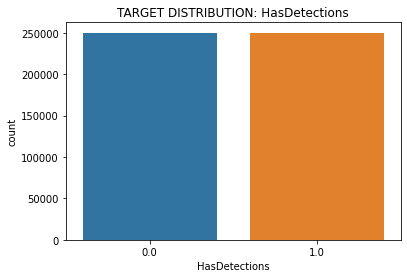

In [282]:
sns.countplot(y) #We make a Countplot to see it graphically. We can see that the values are very balanced.
plt.title('TARGET DISTRIBUTION: HasDetections')
plt.show()

## Remove High-Correlation

* Analyze highly correlated variables (X)
* Eliminate one variable from each highly correlated pair (>95% or >99%...) in the dataset (df)

In [283]:
def highly_correlated(X, y, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i])
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [284]:
highly_correlated(X, y, 99)

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete


# Remove Low Variance

In [285]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 0.01) #Eliminate columns where 99% of the values are equal
vt.fit(X)
cols_lowvar = X.columns[vt.get_support()==False]
print(len(cols_lowvar),' low variance features will be removed:\n', cols_lowvar.to_list())

X.drop(columns=cols_lowvar,inplace=True)

X.shape

14  low variance features will be removed:
 ['Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'AVProductStatesIdentifier_Is_53447.0', 'OsBuild_Is_17134', 'OsBuild_Is_16299', 'OsSuite_Is_768', 'OsSuite_Is_256', 'Census_ProcessorCoreCount_Is_4.0', 'Census_ProcessorCoreCount_Is_2.0', 'Census_ProcessorManufacturerIdentifier_3.0', 'Census_ProcessorManufacturerIdentifier_10.0', 'Census_IsPortableOperatingSystem_1']


(500000, 41)

In [289]:
#As the function is not deleting the low variance columns, we delete them by hand.
df.drop(['Census_PrimaryDiskTotalCapacity', 
         'Census_SystemVolumeTotalCapacity', 
         'Census_TotalPhysicalRAM', 
         'Census_InternalPrimaryDiagonalDisplaySizeInInches', 
         'AVProductStatesIdentifier_Is_53447.0', 
         'OsBuild_Is_17134', 
         'OsBuild_Is_16299', 
         'OsSuite_Is_768', 
         'OsSuite_Is_256', 
         'Census_ProcessorCoreCount_Is_4.0', 
         'Census_ProcessorCoreCount_Is_2.0', 
         'Census_ProcessorManufacturerIdentifier_3.0', 
         'Census_ProcessorManufacturerIdentifier_10.0', 
         'Census_IsPortableOperatingSystem_1'],
        axis='columns', inplace=True)

In [290]:
df.head()

,AVProductsInstalled,HasDetections,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,SkuEdition_Home,SkuEdition_Pro,Census_MDC2FormFactor_Desktop,Census_MDC2FormFactor_Notebook,Census_ProcessorManufacturerIdentifier_1.0,Census_ProcessorManufacturerIdentifier_5.0,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Mobile,Census_OSEdition_Core,Census_OSEdition_Professional,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_ActivationChannel_OEM,Census_ActivationChannel_Retail,ProductName_win8defender,AppVersion_4.18.1807.18075,Platform_Otros,Platform_windows10,Processor_x64,OsVer_10.0.0.0,IsProtected_1.0,SmartScreen_RequireAdmin,Firewall_1.0,Census_HasOpticalDiskDrive_1,Census_GenuineStateName_IS_GENUINE,Census_FlightRing_Retail,Census_IsSecureBootEnabled_1,Census_IsTouchEnabled_1,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_1.0,Wdft_IsGamer_1.0
0,0.00,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.00,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.25,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


# Save cleaned dataset

In [291]:
df.to_csv('/content/drive/MyDrive/TFM - Data Science/DSC0922 – Entregable SupML - {AdroherCarcelléRibas}/malware_preprocessed.csv')